FAIRNESS METRICS VISUALIZATION

Loading data...
✗ Not found: results\bias_lq_0.0.csv
✓ Loaded: results\bias_lq_0.1.csv
✓ Loaded: results\bias_lq_0.2.csv
✓ Loaded: results\bias_lq_0.3.csv
✓ Loaded: results\bias_lq_0.4.csv
✓ Loaded: results\bias_lq_0.5.csv
✓ Loaded: results\bias_lq_0.6.csv
✓ Loaded: results\bias_lq_0.7.csv
✓ Loaded: results\bias_lq_0.8.csv
✓ Loaded: results\bias_lq_0.9.csv

✓ Loaded 9 Bias levels
✓ Total rows: 9
✓ Bias levels: [np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Data summary:
   bias_level  group       ACC        SP        DI       AOD
0         0.1      1  1.112483 -0.287948  0.507837  0.073180
1         0.2      1  1.112689 -0.291032  0.506183  0.074292
2         0.3      1  1.100734 -0.295292  0.501542  0.075518
3         0.4      1  1.097427 -0.305084  0.493386  0.068379
4         0.5      1  1.090437 -0.313629  0.485473  0.068369
5         0.6      

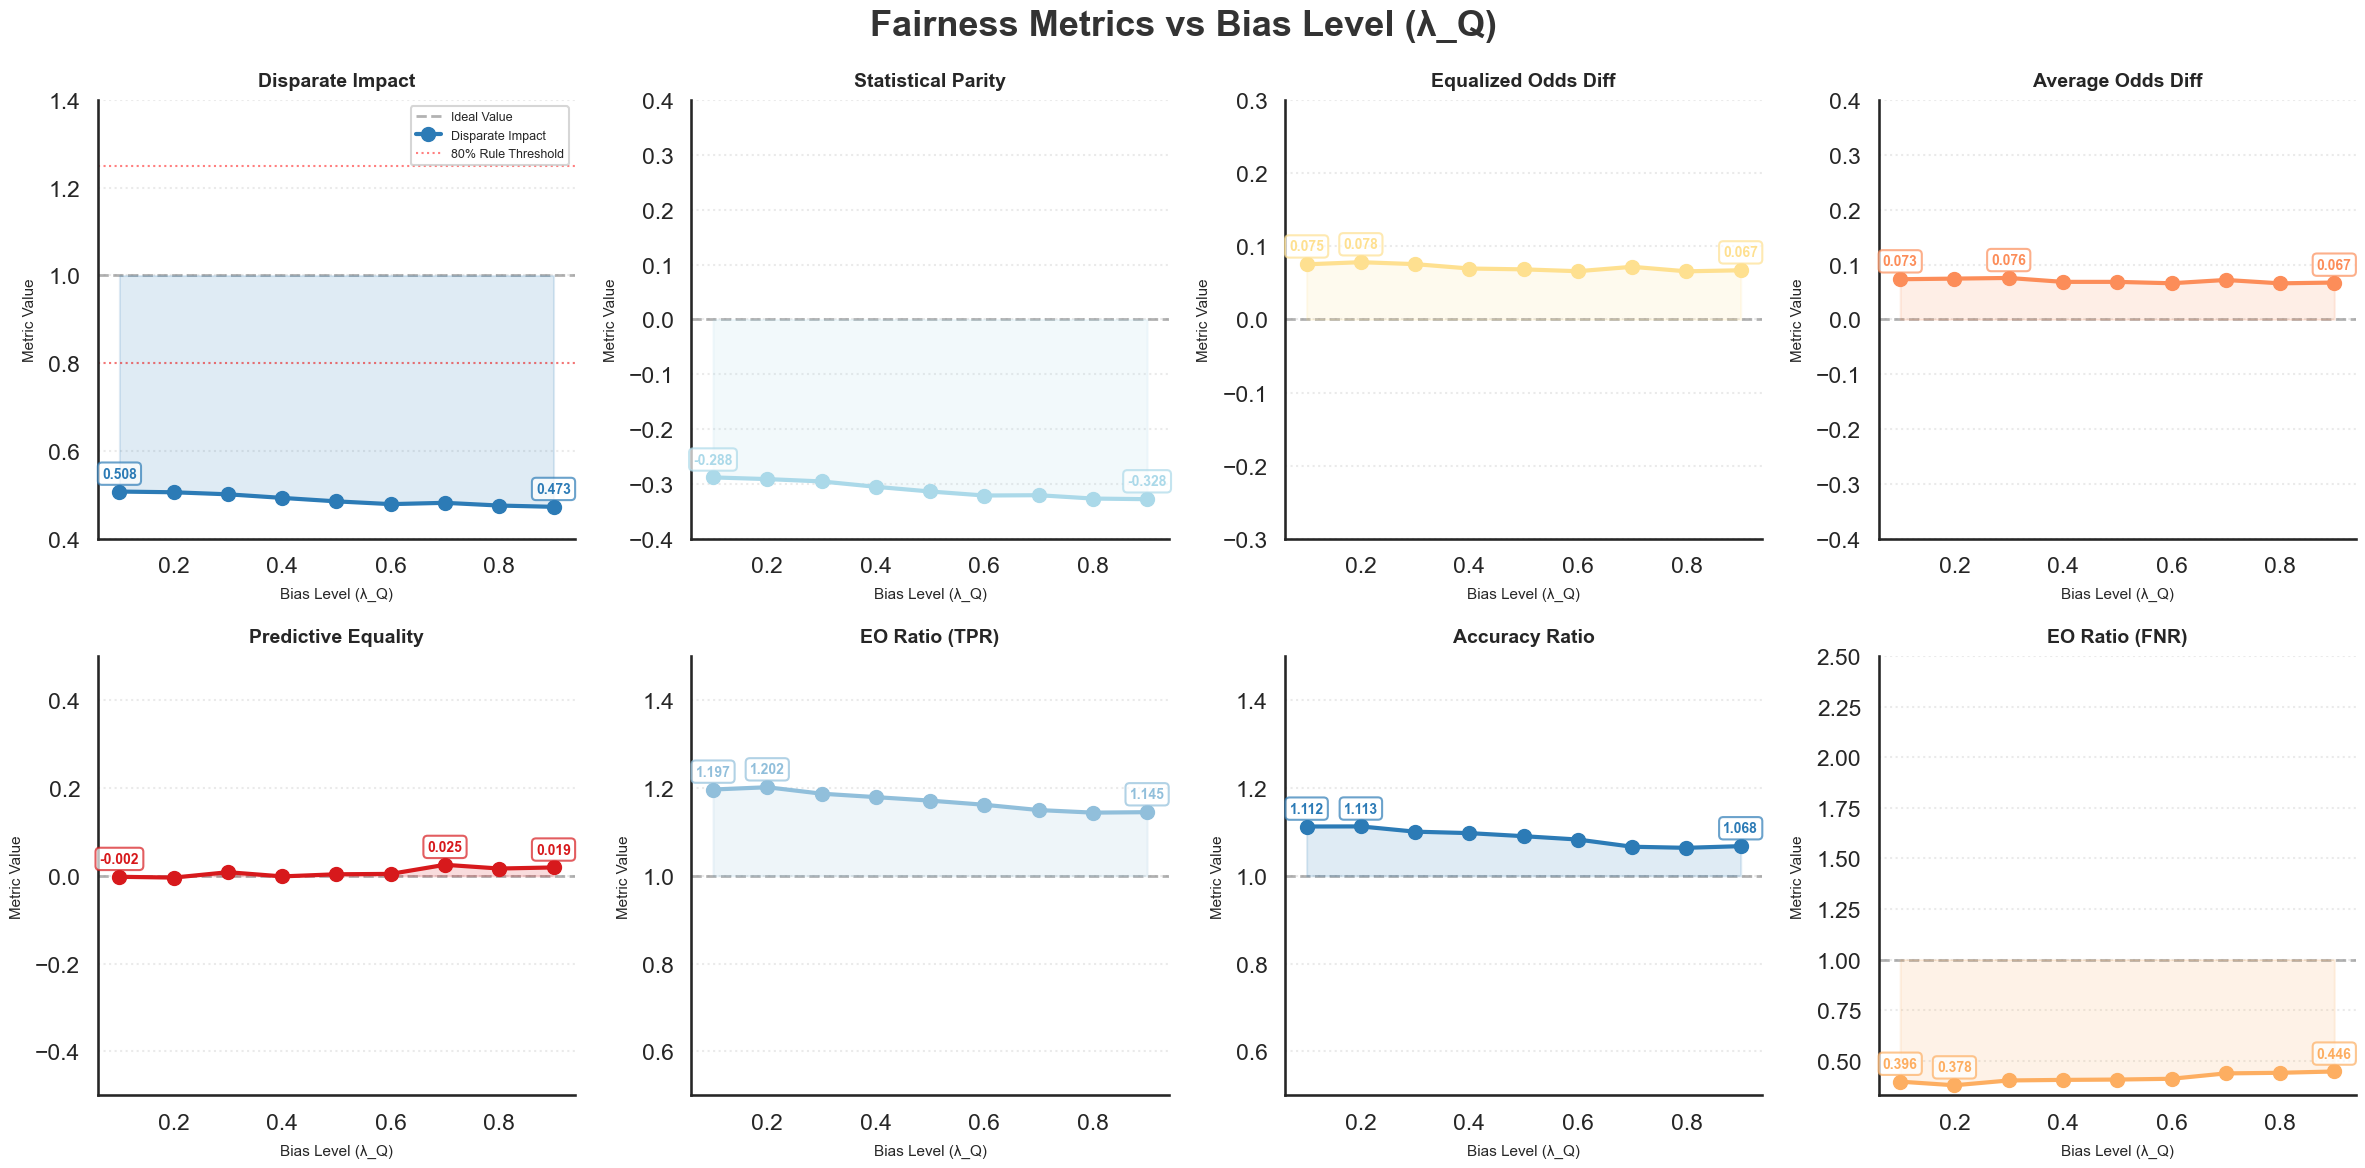

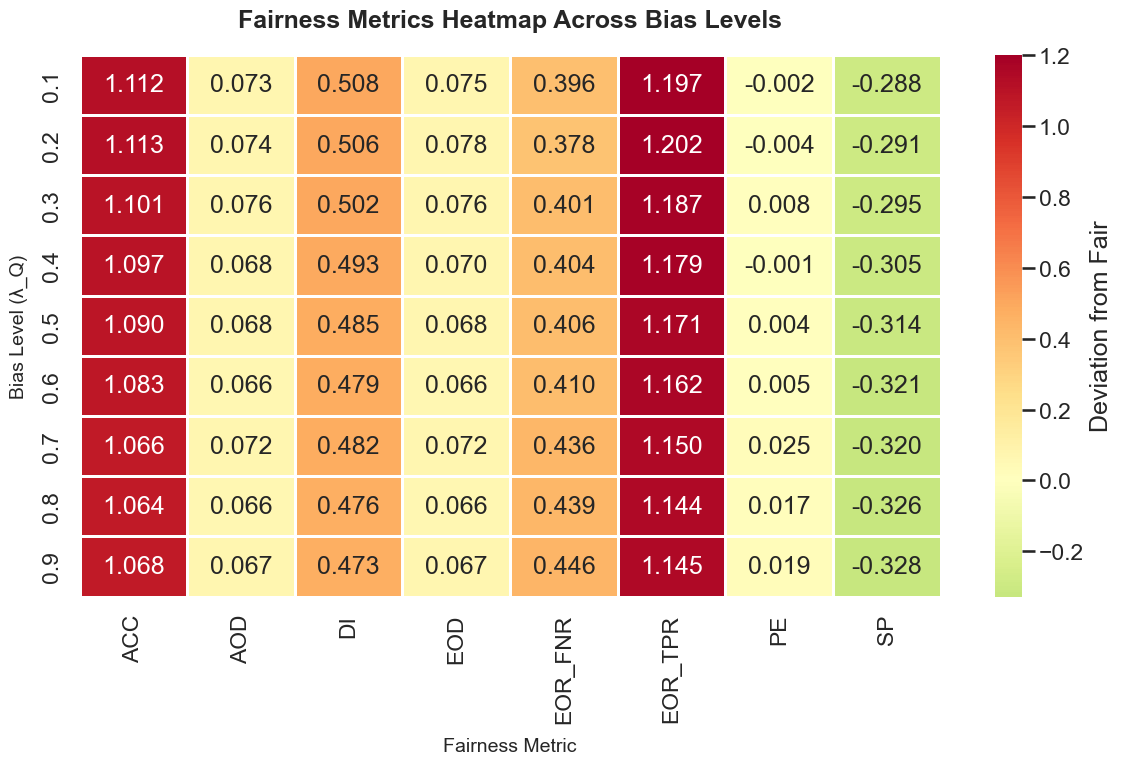

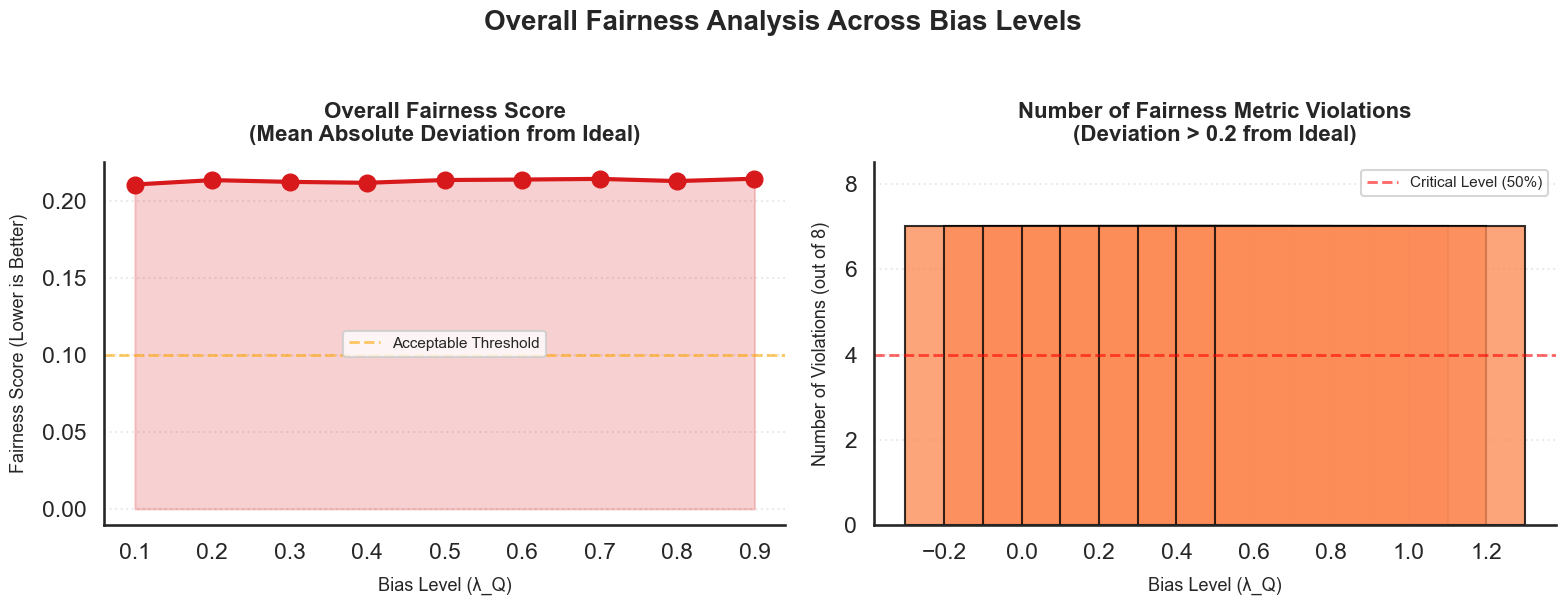


VISUALIZATION COMPLETE

Generated files:
  • fairness_metrics_comparison.png - All 8 metrics across bias levels
  • fairness_metrics_heatmap.png - Heatmap view of all metrics
  • fairness_overall_summary.png - Overall fairness score and violations


In [34]:
"""
Fairness Metrics Visualization Across Bias Levels
==================================================

This script loads fairness evaluation results from multiple bias levels
and creates professional visualizations comparing all 8 fairness metrics.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from fairness_help import calculate_overall_fairness_score
# --- Visualization Setup - Professional Style ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# --- Data Loading Function ---

def load_fairness_results(condition, path, bias_levels, results_dir='results'):
    """
    Load fairness results from multiple bias level CSVs.
    
    Parameters:
    -----------
    bias_levels : list
        List of bias levels to load (e.g., [0.0, 0.1, 0.2, ...])
    results_dir : str
        Directory containing the CSV files
        
    Returns:
    --------
    pd.DataFrame : Combined results from all bias levels
    """
    all_data = []
    
    for bias_level in bias_levels:
        filepath = Path(results_dir) / f'{path}{bias_level:.1f}.csv'
        
        try:
            df = pd.read_csv(filepath)
            df['bias_level'] = bias_level  # Add bias level column
            all_data.append(df)
            print(f"✓ Loaded: {filepath}")
        except FileNotFoundError:
            print(f"✗ Not found: {filepath}")
            continue
    
    if not all_data:
        raise ValueError(f"No data files found! Check your results directory and {condition} levels.")
    
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Filter to only non-reference group (the group being compared)
    # Typically this is where group != reference_group
    combined_df = combined_df[combined_df['group'] != combined_df['reference_group']]
    
    print(f"\n✓ Loaded {len(all_data)} {condition} levels")
    print(f"✓ Total rows: {len(combined_df)}")
    print(f"✓ {condition} levels: {sorted(combined_df['bias_level'].unique())}")
    
    return combined_df

# --- Main Plotting Function ---

def plot_fairness_metrics_comparison(condition, df):
    # Define the 8 fairness metrics with their ideal values and colors
    metrics_config = [
        ('DI', 'Disparate Impact', 1.0, '#2c7bb6', (0.4, 1.4)),
        ('SP', 'Statistical Parity', 0.0, '#abd9e9', (-0.4, 0.4)),
        ('EOD', 'Equalized Odds Diff', 0.0, '#fee090', (-0.3, 0.3)),
        ('AOD', 'Average Odds Diff', 0.0, '#fc8d59', (-0.4, 0.4)),
        ('PE', 'Predictive Equality', 0.0, '#d7191c', (-0.5, 0.5)),
        ('EOR_TPR', 'EO Ratio (TPR)', 1.0, '#91bfdb', (0.5, 1.5)),
        ('ACC', 'Accuracy Ratio', 1.0, '#2c7bb6', (0.5, 1.5)),
        ('EOR_FNR', 'EO Ratio (FNR)', 1.0, '#fdae61', (0.5, 2.5)),     
    ]
    
    # Create figure with 2 rows, 4 columns (8 subplots total)
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    axes = axes.flatten()
    
    # Main title
    fig.suptitle(f'Fairness Metrics vs {condition} Level (λ_Q)', 
                 fontsize=26, fontweight='bold', color='#333333', y=0.98)
    
    # Sort by bias level for proper line plotting
    df_sorted = df.sort_values('bias_level')
    
    # Plot each metric
    for idx, (col, label, ideal_value, color, y_lim) in enumerate(metrics_config):
        ax = axes[idx]
        
        # Extract data
        x = df_sorted['bias_level']
        y = df_sorted[col]
        
        # 1. Draw the ideal/reference line
        ax.axhline(ideal_value, color='gray', linestyle='--', linewidth=2, 
                   alpha=0.6, zorder=1, label='Ideal Value')
        
        # 2. Draw the main metric line with markers
        ax.plot(x, y, marker='o', markersize=10, linewidth=3, 
                color=color, label=label, zorder=2)
        
        # 3. Fill area between curve and ideal to show deviation
        ax.fill_between(x, y, ideal_value, color=color, alpha=0.15)
        
        # 4. Add threshold lines for specific metrics
        if col == 'DI':  # Disparate Impact - 80% rule
            ax.axhline(0.8, color='red', linestyle=':', linewidth=1.5, 
                      alpha=0.5, label='80% Rule Threshold')
            ax.axhline(1.25, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
        
        # 5. Annotate key points (first, last, and worst deviation)
        idx_max_dev = (y - ideal_value).abs().idxmax()
        points_to_annotate = [y.index[0], y.index[-1]]
        if idx_max_dev not in points_to_annotate:
            points_to_annotate.append(idx_max_dev)
        
        for i in points_to_annotate:
            val = df_sorted.loc[i, col]
            bias_val = df_sorted.loc[i, 'bias_level']
            ax.annotate(f'{val:.3f}', xy=(bias_val, val), 
                       xytext=(0, 10), textcoords='offset points',
                       ha='center', fontsize=10, fontweight='bold', 
                       color=color, bbox=dict(boxstyle='round,pad=0.3', 
                       facecolor='white', edgecolor=color, alpha=0.7))
        
        # 6. Styling
        ax.set_title(label, fontsize=14, pad=10, fontweight='bold')
        ax.set_xlabel(f'{condition} Level (λ_Q)', fontsize=11, labelpad=8)
        ax.set_ylabel('Metric Value', fontsize=11, labelpad=8)
        ax.grid(axis='y', linestyle=':', alpha=0.4)
        
        # Set y-limits with small buffer
        current_min, current_max = y.min(), y.max()
        display_min = min(y_lim[0], current_min - 0.05)
        display_max = max(y_lim[1], current_max + 0.05)
        ax.set_ylim(display_min, display_max)
        
        # Add legend for first plot
        if idx == 0:
            ax.legend(loc='best', fontsize=9)
    
    plt.tight_layout()
    return fig

# --- Alternative: Heatmap Visualization ---

def plot_fairness_heatmap(condition, df):
    """
    Create a heatmap showing all metrics across bias levels.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Combined fairness results
    """
    # Metrics to include
    metrics = ['DI','SP','EOD','AOD','PE','EOR_TPR','ACC','EOR_FNR']
    
    # Pivot data for heatmap
    pivot_data = df.pivot_table(
        values=metrics,
        index='bias_level',
        aggfunc='first'
    )
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create heatmap
    sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='RdYlGn_r',
                center=0, cbar_kws={'label': 'Deviation from Fair'},
                linewidths=1, linecolor='white', ax=ax)
    
    ax.set_title(f'Fairness Metrics Heatmap Across {condition} Levels', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Fairness Metric', fontsize=14, labelpad=10)
    ax.set_ylabel(f'{condition} Level (λ_Q)', fontsize=14, labelpad=10)
    
    plt.tight_layout()
    return fig

# --- Deviation from Ideal Summary Plot ---

def plot_overall_fairness_summary(condition, df):
    """
    Plot overall fairness score (mean deviation from ideal) across bias levels.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Combined fairness results
    """
    # Calculate overall fairness score for each bias level
    metrics_deviations = []
    
    for bias_level in sorted(df['bias_level'].unique()):
        subset = df[df['bias_level'] == bias_level].iloc[0]
        
        # Calculate deviations from ideal
        deviations = [
            abs(subset['ACC'] - 1.0),
            abs(subset['PE'] - 0.0),
            abs(subset['EOR_FNR'] - 1.0),
            abs(subset['SP'] - 0.0),
            abs(subset['DI'] - 1.0),
            abs(subset['EOD'] - 0.0),
            abs(subset['EOR_TPR'] - 1.0),
            abs(subset['AOD'] - 0.0)
        ]
        
        overall_score = subset['overall_fairness_score']
        
        metrics_deviations.append({
            'bias_level': bias_level,
            'overall_fairness_score': overall_score,
            'num_violations': sum(1 for d in deviations if d > 0.05)  # Count significant violations
        })
    
    summary_df = pd.DataFrame(metrics_deviations)
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Overall Fairness Score
    ax1.plot(summary_df['bias_level'], summary_df['overall_fairness_score'],
             marker='o', markersize=12, linewidth=3, color='#d7191c')
    ax1.fill_between(summary_df['bias_level'], 
                     summary_df['overall_fairness_score'], 
                     0, color='#d7191c', alpha=0.2)
    ax1.axhline(0.1, color='orange', linestyle='--', linewidth=2, 
                alpha=0.6, label='Acceptable Threshold')
    ax1.set_title('Overall Fairness Score\n(Mean Absolute Deviation from Ideal)', 
                  fontsize=16, fontweight='bold', pad=15)
    ax1.set_xlabel(f'{condition} Level (λ_Q)', fontsize=13, labelpad=10)
    ax1.set_ylabel('Fairness Score (Lower is Better)', fontsize=13, labelpad=10)
    ax1.grid(axis='y', linestyle=':', alpha=0.4)
    ax1.legend(fontsize=11)
    
    # Plot 2: Number of Violations
    ax2.bar(summary_df['bias_level'], summary_df['num_violations'],
            color='#fc8d59', alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.axhline(4, color='red', linestyle='--', linewidth=2, 
                alpha=0.6, label='Critical Level (50%)')
    ax2.set_title('Number of Fairness Metric Violations\n(Deviation > 0.2 from Ideal)', 
                  fontsize=16, fontweight='bold', pad=15)
    ax2.set_xlabel(f'{condition} Level (λ_Q)', fontsize=13, labelpad=10)
    ax2.set_ylabel('Number of Violations (out of 8)', fontsize=13, labelpad=10)
    ax2.set_ylim(0, 8.5)
    ax2.grid(axis='y', linestyle=':', alpha=0.4)
    ax2.legend(fontsize=11)
    
    fig.suptitle(f'Overall Fairness Analysis Across {condition} Levels', 
                 fontsize=20, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    return fig

# --- Main Execution ---

def main():
    """
    Main execution function.
    """
    print("="*80)
    print("FAIRNESS METRICS VISUALIZATION")
    print("="*80)
    
    # Define bias levels to load
    levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    #condition = "Imbalance"
    #path = "imbalance_pu_"

    condition = "Bias"
    path = "bias_lq_"
    # Load data
    print("\nLoading data...")
    df = load_fairness_results(condition, path, levels, results_dir='results')
    
    print("\nData summary:")
    print(df[['bias_level', 'group', 'ACC', 'SP', 'DI', 'AOD']].head(10))
    
    # Create visualizations
    print("\n" + "="*80)
    print("CREATING VISUALIZATIONS")
    print("="*80)
    
    # 1. Individual Metrics Comparison
    print("\n1. Creating individual metrics comparison plot...")
    fig1 = plot_fairness_metrics_comparison(condition,df)
    print("   ✓ Saved: fairness_metrics_comparison.png")
    
    # 2. Heatmap
    print("\n2. Creating heatmap visualization...")
    fig2 = plot_fairness_heatmap(condition, df)
    print("   ✓ Saved: fairness_metrics_heatmap.png")
    
    # 3. Overall Fairness Summary
    print("\n3. Creating overall fairness summary...")
    fig3 = plot_overall_fairness_summary(condition, df)
    print("   ✓ Saved: fairness_overall_summary.png")
    
    # Show all plots
    plt.show()
    
    print("\n" + "="*80)
    print("VISUALIZATION COMPLETE")
    print("="*80)
    print("\nGenerated files:")
    print("  • fairness_metrics_comparison.png - All 8 metrics across bias levels")
    print("  • fairness_metrics_heatmap.png - Heatmap view of all metrics")
    print("  • fairness_overall_summary.png - Overall fairness score and violations")
    print("="*80)

if __name__ == "__main__":
    main()